In [1]:
import os
import pandas as pd
import numpy as np
import shutil
import librosa
import cv2
from sklearn.preprocessing import MinMaxScaler
import librosa.display
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
# Function to count audio files in a directory
def count_audio_files(directory):
    return len([f for f in os.listdir(directory) if f.endswith('.wav')])

# Loading Data
patient_diagnosis_info = pd.read_csv(r'C:\Users\Jiary\Documents\GitHub\ML\csv_data\patient_diagnosis_filtered_data.csv',
                                     names=['pid', 'disease'])
print(patient_diagnosis_info.head())

total_patient_per_disease = patient_diagnosis_info['disease'].value_counts().to_dict()
print(f'Total Cases: {sum(total_patient_per_disease.values())}')


   pid  disease
0  101     URTI
1  102  Healthy
2  104     COPD
3  105     URTI
4  106     COPD
Total Cases: 123


In [6]:
initial_audio_data = r'C:\Users\Jiary\Documents\GitHub\ML\Processed_Audio_Files'
audio_dir = r'C:\Users\Jiary\Documents\GitHub\ML\Final_Audio_Dataset'

# Count audio files in both directories
initial_audio_count = count_audio_files(initial_audio_data)
final_audio_count = count_audio_files(audio_dir)

print(f'Number of audio files in Processed_Audio_Files: {initial_audio_count}')
print(f'Number of audio files in Final_Audio_Dataset: {final_audio_count}')

Number of audio files in Processed_Audio_Files: 6860
Number of audio files in Final_Audio_Dataset: 8825


In [7]:
# Function to organize files by disease
def organize_files_by_disease(directory, patient_diagnosis_info):
    disease_count = defaultdict(int)
    disease_files = defaultdict(list)

    for audio_file in os.listdir(directory):
        if audio_file.endswith('.wav'):  # Ensure only audio files are processed
            parts = audio_file.split('_')
            pid = int(parts[0])
            disease = patient_diagnosis_info.loc[patient_diagnosis_info['pid'] == pid, 'disease'].values[0]
            disease_count[disease] += 1
            disease_files[disease].append(os.path.join(directory, audio_file))
    
    return disease_count, disease_files


DATA COMPARISON

In [8]:
# Organize files by disease for Processed_Audio_Files
processed_disease_count, processed_disease_files = organize_files_by_disease(initial_audio_data, patient_diagnosis_info)

# Organize files by disease for Final_Audio_Dataset
final_disease_count, final_disease_files = organize_files_by_disease(audio_dir, patient_diagnosis_info)

# Print disease-wise counts for Processed_Audio_Files
print("\nDisease-wise counts for Processed_Audio_Files:")
for disease, count in processed_disease_count.items():
    print(f'Number of Audio Samples: {count}, Disease: {disease}')

# Print disease-wise counts for Final_Audio_Dataset
print("\nDisease-wise counts for Final_Audio_Dataset:")
for disease, count in final_disease_count.items():
    print(f'Number of Audio Samples: {count}, Disease: {disease}')


Disease-wise counts for Processed_Audio_Files:
Number of Audio Samples: 243, Disease: URTI
Number of Audio Samples: 322, Disease: Healthy
Number of Audio Samples: 5746, Disease: COPD
Number of Audio Samples: 104, Disease: Bronchiectasis
Number of Audio Samples: 285, Disease: Pneumonia
Number of Audio Samples: 160, Disease: Bronchiolitis

Disease-wise counts for Final_Audio_Dataset:
Number of Audio Samples: 648, Disease: URTI
Number of Audio Samples: 712, Disease: Healthy
Number of Audio Samples: 5746, Disease: COPD
Number of Audio Samples: 499, Disease: Bronchiectasis
Number of Audio Samples: 700, Disease: Pneumonia
Number of Audio Samples: 520, Disease: Bronchiolitis


NameError: name 'final_disease_count' is not defined

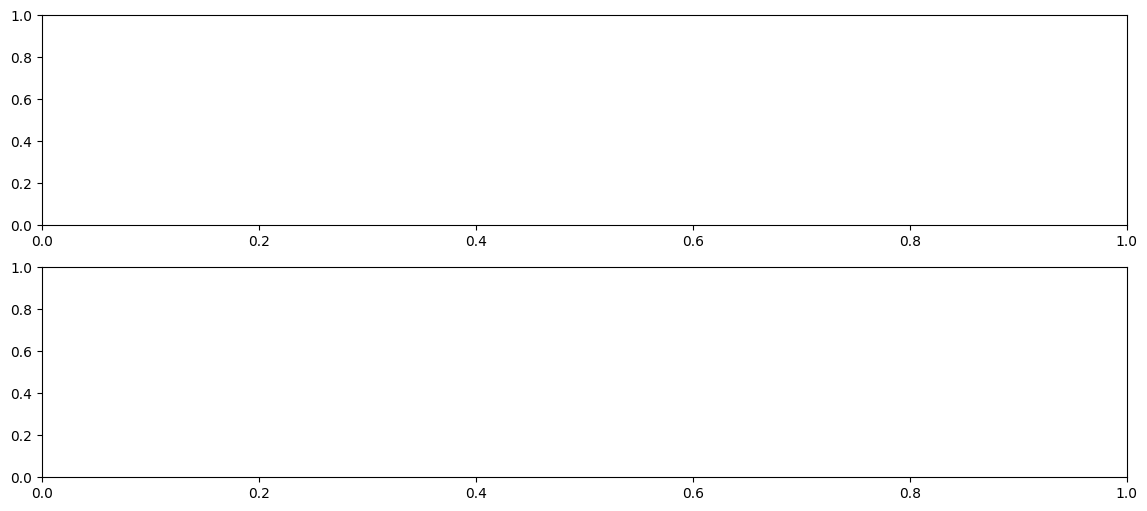

In [3]:
fig, axes = plt.subplots(2, 1, figsize=(14, 6))
axes[0].bar(final_disease_count.keys(), final_disease_count.values(), color='lightgreen')
axes[0].set_xlabel('Disease')
axes[0].set_ylabel('Number of Audio Samples')
axes[0].set_title('Augmented Data Distribution')
axes[0].tick_params( axis='x', rotation=45)

axes[1].bar(processed_disease_count.keys(), processed_disease_count.values(), color='skyblue')
axes[1].set_xlabel('Disease')
axes[1].set_ylabel('Number of Audio Samples')
axes[1].set_title('Original Data Distribution')
axes[1].tick_params( axis='x', rotation=45)

plt.tight_layout()
plt.show()



GENERATING SPECTOGRAMS

In [63]:
#feature extraction for Ml train and evaluation
Spectogram_folder=r'C:\Users\Jiary\Documents\GitHub\ML\Spectograms'
os.makedirs(Spectogram_folder, exist_ok=True)
diseases=patient_diagnosis_info['disease'].unique()
print(diseases)

def make_spectrogram(audio_path, target_shape=(128,128)):
    y,sr=librosa.load(audio_path, sr=None)
    s=librosa.feature.melspectrogram(y=y, sr=sr)
    s_db=librosa.amplitude_to_db(s, ref=np.max)
    s_resized=cv2.resize(s_db,target_shape)
    return np.expand_dims(s_resized, axis=-1)

for filename in os.listdir(audio_dir):
    if filename.endswith('.wav'):
        parts=filename.split('_')
        pid=parts[0]
        try:

            disease=patient_diagnosis_info.loc[patient_diagnosis_info['pid']==int(pid),'disease'].values[0]
        except:
            print(f'No disease information found for {pid}')
            continue
        
        output_filename=filename.replace('.wav','.npy')
        output_path=os.path.join(Spectogram_folder, output_filename)

        audio_path=os.path.join(audio_dir, filename)
        mel_spectogram=make_spectrogram(audio_path)
        np.save(output_path, mel_spectogram)
        print(f'Processed {filename} and saved as {output_filename}')


['URTI' 'Healthy' 'COPD' 'Bronchiectasis' 'Pneumonia' 'Bronchiolitis']
Processed 101_1b1_Al_sc_Meditron_seg0_C0.0_W0.0.wav and saved as 101_1b1_Al_sc_Meditron_seg0_C0.0_W0.0.npy
Processed 101_1b1_Al_sc_Meditron_seg10_C0.0_W0.0.wav and saved as 101_1b1_Al_sc_Meditron_seg10_C0.0_W0.0.npy
Processed 101_1b1_Al_sc_Meditron_seg11_C0.0_W0.0.wav and saved as 101_1b1_Al_sc_Meditron_seg11_C0.0_W0.0.npy
Processed 101_1b1_Al_sc_Meditron_seg1_C0.0_W0.0.wav and saved as 101_1b1_Al_sc_Meditron_seg1_C0.0_W0.0.npy
Processed 101_1b1_Al_sc_Meditron_seg2_C0.0_W0.0.wav and saved as 101_1b1_Al_sc_Meditron_seg2_C0.0_W0.0.npy
Processed 101_1b1_Al_sc_Meditron_seg2_C0.0_W0.0_aug1.wav and saved as 101_1b1_Al_sc_Meditron_seg2_C0.0_W0.0_aug1.npy
Processed 101_1b1_Al_sc_Meditron_seg2_C0.0_W0.0_aug2.wav and saved as 101_1b1_Al_sc_Meditron_seg2_C0.0_W0.0_aug2.npy
Processed 101_1b1_Al_sc_Meditron_seg2_C0.0_W0.0_aug3.wav and saved as 101_1b1_Al_sc_Meditron_seg2_C0.0_W0.0_aug3.npy
Processed 101_1b1_Al_sc_Meditron_seg2_C

C:\Users\Jiary\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1848
  warnings.warn(


Processed 109_1b1_Pl_sc_Litt3200_seg4_C0.0_W0.0.wav and saved as 109_1b1_Pl_sc_Litt3200_seg4_C0.0_W0.0.npy
Processed 109_1b1_Pl_sc_Litt3200_seg5_C0.0_W0.0.wav and saved as 109_1b1_Pl_sc_Litt3200_seg5_C0.0_W0.0.npy
Processed 109_1b1_Pl_sc_Litt3200_seg6_C0.0_W0.0.wav and saved as 109_1b1_Pl_sc_Litt3200_seg6_C0.0_W0.0.npy
Processed 109_1b1_Pl_sc_Litt3200_seg7_C0.0_W0.0.wav and saved as 109_1b1_Pl_sc_Litt3200_seg7_C0.0_W0.0.npy
Processed 109_1b1_Pl_sc_Litt3200_seg8_C0.0_W0.0.wav and saved as 109_1b1_Pl_sc_Litt3200_seg8_C0.0_W0.0.npy
Processed 109_1b1_Pr_sc_Litt3200_seg0_C0.0_W0.0.wav and saved as 109_1b1_Pr_sc_Litt3200_seg0_C0.0_W0.0.npy
Processed 109_1b1_Pr_sc_Litt3200_seg10_C0.0_W0.0.wav and saved as 109_1b1_Pr_sc_Litt3200_seg10_C0.0_W0.0.npy
Processed 109_1b1_Pr_sc_Litt3200_seg11_C0.0_W0.0.wav and saved as 109_1b1_Pr_sc_Litt3200_seg11_C0.0_W0.0.npy
Processed 109_1b1_Pr_sc_Litt3200_seg12_C0.0_W0.0.wav and saved as 109_1b1_Pr_sc_Litt3200_seg12_C0.0_W0.0.npy
Processed 109_1b1_Pr_sc_Litt320

MERGING THE FILES INTO THEIR FOLDERS 

In [64]:
Spectogram_folder = r'C:\Users\Jiary\Documents\GitHub\ML\Spectograms'
os.makedirs(Spectogram_folder, exist_ok=True)
pid_to_disease = dict(zip(patient_diagnosis_info['pid'], patient_diagnosis_info['disease']))
unique_diseases = patient_diagnosis_info['disease'].unique()
print("Unique Diseases:", unique_diseases)

# Create folders for each unique disease
for disease in unique_diseases:
    disease_folder = os.path.join(Spectogram_folder, disease)
    os.makedirs(disease_folder, exist_ok=True)
    print(f'Created folder: {disease_folder}')

# Move .npy files to disease-specific folders
for filename in os.listdir(Spectogram_folder):
    if filename.endswith('.npy'):
        try:
            pid = int(filename.split('_')[0])
            if pid in pid_to_disease:
                disease = pid_to_disease[pid]
                disease_folder = os.path.join(Spectogram_folder, disease)
                src_path = os.path.join(Spectogram_folder, filename)
                dst_path = os.path.join(disease_folder, filename)
                if not os.path.exists(src_path):
                    print(f'ERROR: File not found: {src_path}')
                    continue
                if os.path.exists(dst_path):
                    print(f'Skipping {filename}: File already Exists')
                    continue
                if not os.path.exists(disease_folder):
                    print(f'ERROR: Destination folder not found: {disease_folder}')
                    continue
                shutil.move(src_path, dst_path)
                print(f'Moved {filename} to {disease_folder}')
            else:
                print(f'PID {pid} not found in CSV file for file {filename}')
        except ValueError:
            print(f'Skipping {filename} (Invalid PID)')

Unique Diseases: ['URTI' 'Healthy' 'COPD' 'Bronchiectasis' 'Pneumonia' 'Bronchiolitis']
Created folder: C:\Users\Jiary\Documents\GitHub\ML\Spectograms\URTI
Created folder: C:\Users\Jiary\Documents\GitHub\ML\Spectograms\Healthy
Created folder: C:\Users\Jiary\Documents\GitHub\ML\Spectograms\COPD
Created folder: C:\Users\Jiary\Documents\GitHub\ML\Spectograms\Bronchiectasis
Created folder: C:\Users\Jiary\Documents\GitHub\ML\Spectograms\Pneumonia
Created folder: C:\Users\Jiary\Documents\GitHub\ML\Spectograms\Bronchiolitis
Skipping 101_1b1_Al_sc_Meditron_seg0_C0.0_W0.0.npy: File already Exists
Skipping 101_1b1_Al_sc_Meditron_seg10_C0.0_W0.0.npy: File already Exists
Skipping 101_1b1_Al_sc_Meditron_seg11_C0.0_W0.0.npy: File already Exists
Skipping 101_1b1_Al_sc_Meditron_seg1_C0.0_W0.0.npy: File already Exists
Skipping 101_1b1_Al_sc_Meditron_seg2_C0.0_W0.0.npy: File already Exists
Moved 101_1b1_Al_sc_Meditron_seg2_C0.0_W0.0_aug1.npy to C:\Users\Jiary\Documents\GitHub\ML\Spectograms\URTI
Moved 1

VERIFICATION OF NUMBERS

In [65]:
#getting number of files per folder 
# After moving files, count the number of files in each disease folder
for disease in unique_diseases:
    disease_folder = os.path.join(Spectogram_folder, disease)
    
    # Check if the folder exists
    if os.path.exists(disease_folder):
        # List all .npy files in the folder
        files_in_folder = [f for f in os.listdir(disease_folder) if f.endswith('.npy')]
        
        # Get the number of files
        num_files = len(files_in_folder)
        
        # Print the result
        print(f'Folder: {disease_folder} | Number of files: {num_files}')
    else:
        print(f'Folder not found: {disease_folder}')

Folder: C:\Users\Jiary\Documents\GitHub\ML\Spectograms\URTI | Number of files: 648
Folder: C:\Users\Jiary\Documents\GitHub\ML\Spectograms\Healthy | Number of files: 712
Folder: C:\Users\Jiary\Documents\GitHub\ML\Spectograms\COPD | Number of files: 5746
Folder: C:\Users\Jiary\Documents\GitHub\ML\Spectograms\Bronchiectasis | Number of files: 499
Folder: C:\Users\Jiary\Documents\GitHub\ML\Spectograms\Pneumonia | Number of files: 700
Folder: C:\Users\Jiary\Documents\GitHub\ML\Spectograms\Bronchiolitis | Number of files: 520


Plotting spectrogram for: 111_1b2_Tc_sc_Meditron_seg0_C0.0_W0.0.npy


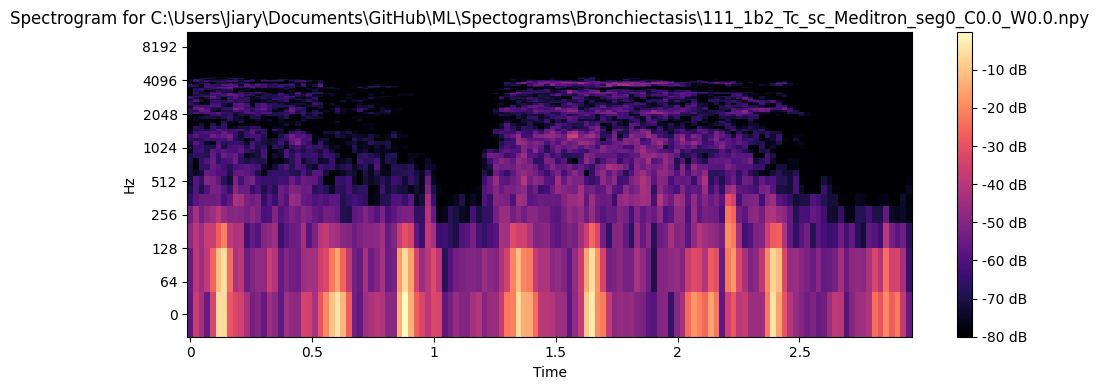

Plotting spectrogram for: 111_1b2_Tc_sc_Meditron_seg0_C0.0_W0.0_aug1.npy


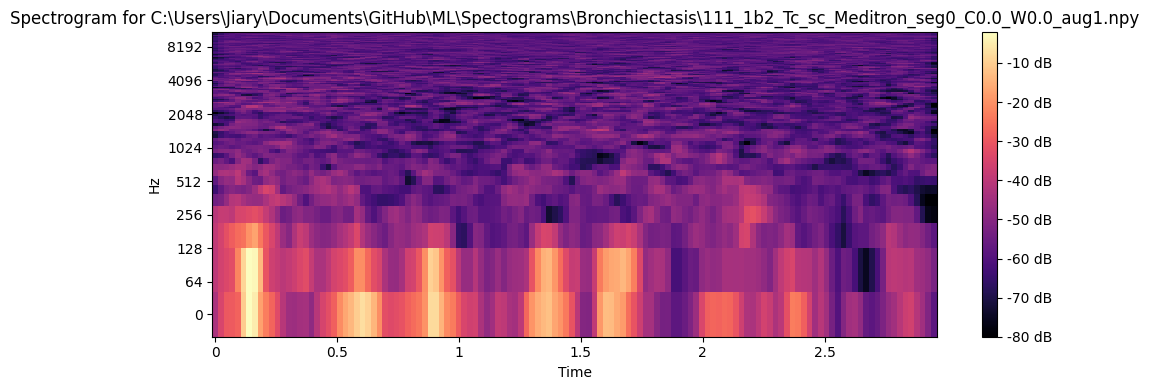

In [ ]:
# List of example .npy files
numarray_dir=r'C:\Users\Jiary\Documents\GitHub\ML\Spectograms\Bronchiectasis'
example_files = [
    "111_1b2_Tc_sc_Meditron_seg0_C0.0_W0.0.npy",
    "111_1b2_Tc_sc_Meditron_seg0_C0.0_W0.0_aug1.npy"
]
for file_name in example_files:
    file_path = os.path.join(numarray_dir, file_name)
    if os.path.exists(file_path):
        data = np.load(file_path)
        print(f'File: {file_name}, Shape: {data.shape}')
    else:
        print(f'File not found: {file_name}')

# Function to plot spectrogram from a .npy file
def plot_spectrogram_from_npy(file_path):
    # Load the .npy file
    data = np.load(file_path)
    
    # Remove the singleton dimension (128, 128, 1) -> (128, 128)
    if data.shape[-1] == 1:
        spectrogram = np.squeeze(data, axis=-1)
    else:
        spectrogram = data
    
    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram for {file_path}')
    plt.tight_layout()
    plt.show()

# Plot spectrograms for the example files
for file_name in example_files:
    file_path = os.path.join(numarray_dir, file_name)
    if os.path.exists(file_path):
        print(f'Plotting spectrogram for: {file_name}')
        plot_spectrogram_from_npy(file_path)
    else:
        print(f'File not found: {file_name}')